In [1]:
# --- # Simplified Salary Prediction Model



In [2]:
# --- 1. Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [3]:
# --- 2. Load Data ---
# Make sure 'MultipleFiles/employees data set csv.csv' is in the correct path
# relative to where your Jupyter Notebook is running, or provide the full path.
file_path = r"C:\Users\siddharth pandey\OneDrive\Desktop\employees data set csv.csv"
data = pd.read_csv(file_path)

print("--- Data Preview ---")
print(data.head())
print("\n")



--- Data Preview ---
   No First Name Last Name  Gender  Start Date  Years          Department  \
0   1     Ghadir     Hmshw    Male  2018-04-04      2     Quality Control   
1   2       Omar    Hishan    Male  2020-05-21      0     Quality Control   
2   3      Ailya    Sharaf  Female  2017-09-28      3  Major Mfg Projects   
3   4       Lwiy     Qbany    Male  2018-08-14      2       Manufacturing   
4   5      Ahmad     Bikri    Male  2020-03-11      0       Manufacturing   

                Country Center  Monthly Salary  Annual Salary  Job Rate  \
0                 Egypt   West            1560          18720       3.0   
1          Saudi Arabia   West            3247          38964       1.0   
2          Saudi Arabia   West            2506          30072       2.0   
3  United Arab Emirates   Main            1828          21936       3.0   
4                 Egypt   Main             970          11640       5.0   

   Sick Leaves  Unpaid Leaves  Overtime Hours  
0            1   

In [4]:
# --- 3. Prepare Data ---

# Drop unnecessary columns and those that cause data leakage
# 'No' is just an ID. 'Start Date' is covered by 'Years'.
# 'Monthly Salary' is too similar to 'Annual Salary' (our target)
data_cleaned = data.drop(['No', 'Start Date', 'Monthly Salary'], axis=1)

# Define what we want to predict (Annual Salary) and our features
target_column = 'Annual Salary'
y = data_cleaned[target_column] # The salary we want to predict
X = data_cleaned.drop(target_column, axis=1) # All other columns are features

# Separate numerical and categorical features for processing
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

print(f"Features used for prediction: {X.columns.tolist()}")
print(f"Target variable: {target_column}")
print("\n")



Features used for prediction: ['First Name', 'Last Name', 'Gender', 'Years', 'Department', 'Country', 'Center', 'Job Rate', 'Sick Leaves', 'Unpaid Leaves', 'Overtime Hours']
Target variable: Annual Salary




In [5]:
# --- 4. Preprocessing Steps (Scaling and Encoding) ---

# Create steps to prepare our data:
# 1. Scale numerical features (e.g., 'Years', 'Job Rate')
# 2. Convert categorical features (e.g., 'Gender', 'Department') into numbers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features), # Apply scaling to numbers
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features) # Apply one-hot encoding to categories
    ])



In [6]:
# --- 5. Split Data for Training and Testing ---
# We split our data to train the model on one part and test it on unseen data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data size: {X_train.shape[0]} samples")
print(f"Testing data size: {X_test.shape[0]} samples")
print("\n")



Training data size: 551 samples
Testing data size: 138 samples




In [7]:
# --- 6. Build and Train the Model (Random Forest) ---

# We'll use a RandomForestRegressor, which is a powerful model for many tasks
# The Pipeline combines preprocessing and the model into one step
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

print("--- Training the Random Forest Model ---")
model_pipeline.fit(X_train, y_train)
print("Model training complete!")
print("\n")



--- Training the Random Forest Model ---
Model training complete!




In [8]:
# --- 7. Evaluate the Model ---

# Make predictions on the test data
predictions = model_pipeline.predict(X_test)

# Calculate how well our model performed
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse) # Root Mean Squared Error (easier to understand than MSE)
r2 = r2_score(y_test, predictions) # R-squared (how much variance is explained by the model)

print("--- Model Evaluation Results ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print("\n")



--- Model Evaluation Results ---
Mean Squared Error (MSE): 103999121.33
Root Mean Squared Error (RMSE): 10198.00
R-squared (R2): -0.18




In [15]:
# --- 8. Make a Prediction on New Data ---

print("--- Predicting Salary for a New Employee ---")

# Create a new, imaginary employee's data
# Make sure all feature columns are present, even if values are different
new_employee_data = pd.DataFrame({
    'First Name': ['New'],
    'Last Name': ['Candidate'],
    'Gender': ['Female'],
    'Years': [3], # 3 years of experience
    'Department': ['Marketing'],
    'Country': ['United Arab Emirates'],
    'Center': ['Main'],
    'Job Rate': [4.0],
    'Sick Leaves': [1],
    'Unpaid Leaves': [0],
    'Overtime Hours': [5]
})

print("New Employee Details:")
print(new_employee_data)
print("\n")

# Use our trained model to predict their annual salary
predicted_salary = model_pipeline.predict(new_employee_data)

print(f"Predicted Annual Salary: ${predicted_salary[0]:,.2f}")
print("\n")



--- Predicting Salary for a New Employee ---
New Employee Details:
  First Name  Last Name  Gender  Years Department               Country  \
0        New  Candidate  Female      3  Marketing  United Arab Emirates   

  Center  Job Rate  Sick Leaves  Unpaid Leaves  Overtime Hours  
0   Main       4.0            1              0               5  


Predicted Annual Salary: $21,866.04




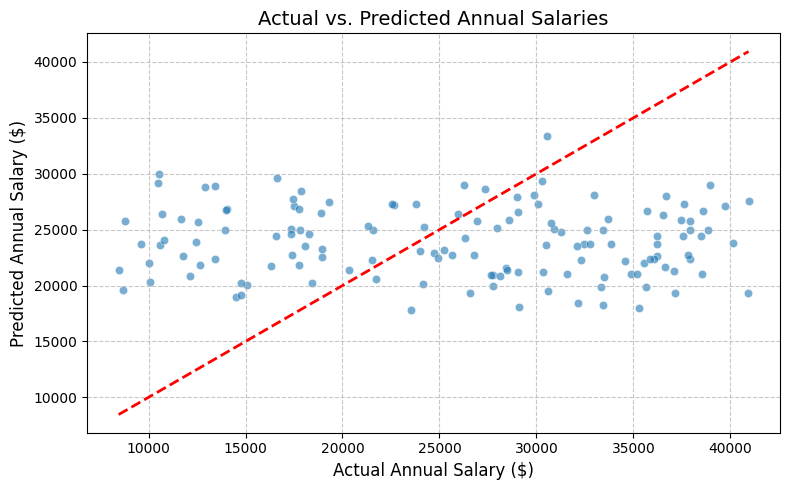

In [17]:
# Plot 1: Actual vs. Predicted Annual Salaries
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Diagonal line for perfect prediction
plt.xlabel("Actual Annual Salary ($)", fontsize=12)
plt.ylabel("Predicted Annual Salary ($)", fontsize=12)
plt.title("Actual vs. Predicted Annual Salaries", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [10]:
# --- Conclusion ---
print("--- Conclusion ---")
print("We successfully built a simplified salary prediction model.")
print("The model was trained on employee data and can now estimate annual salaries")
print("based on various employee attributes.")


--- Conclusion ---
We successfully built a simplified salary prediction model.
The model was trained on employee data and can now estimate annual salaries
based on various employee attributes.
